<a href="https://colab.research.google.com/github/BryanskPartizan/Project-GAN/blob/main/ProjectGAN_part_1_ETL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")
mpl.rcParams['figure.figsize'] = (24, 12)
mpl.rcParams['axes.grid'] = True

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Project GAN/projectGAN_initial_dataset.xlsx')

In [ ]:
df

,Дата,Австралия,Австрия,Бельгия,Болгария,Великобритания,Венгрия,Германия,Греция,Грузия,...,Япония,Краснодарский край,Ленинградская обл.,Москва,Московская обл.,Мурманская обл.,Нижегородская обл.,Ростовская обл.,Санкт-Петербург,Тульская обл.
0,2020-01-22,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
1,2020-01-23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-01-26,4,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083,2023-01-09,1262,1854,0,230,0,0,30533,0,0,...,95308,14,31,793,81,6,29,4,277,7
1084,2023-01-10,1150,3019,0,193,0,0,22119,0,0,...,78982,35,5,1123,42,11,22,1,304,11
1085,2023-01-11,1150,3164,0,128,34,1597,19379,0,0,...,198873,41,29,1678,158,11,26,29,335,17
1086,2023-01-12,28243,2306,3913,137,33299,0,12956,0,1656,...,185472,49,39,1539,232,14,90,24,396,12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1088 entries, 0 to 1087
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Дата                1088 non-null   datetime64[ns]
 1   Австралия           1088 non-null   int64         
 2   Австрия             1088 non-null   int64         
 3   Бельгия             1088 non-null   int64         
 4   Болгария            1088 non-null   int64         
 5   Великобритания      1088 non-null   int64         
 6   Венгрия             1088 non-null   int64         
 7   Германия            1088 non-null   int64         
 8   Греция              1088 non-null   int64         
 9   Грузия              1088 non-null   int64         
 10  Дания               1088 non-null   int64         
 11  Египет              1088 non-null   int64         
 12  Израиль             1088 non-null   int64         
 13  Индия               1088 non-null   int64       

In [ ]:
df.rename(
    columns={
        'Дата':'Date',
        'Австралия': 'Australia',
        'Австрия': 'Austria',
        'Бельгия': 'Belgium',
        'Болгария': 'Bulgary',
        'Великобритания': 'UK',
        'Венгрия': 'Hungrary',
        'Германия': 'Germany',
        'Греция': 'Greece',
        'Грузия': 'Georgia',
        'Дания': 'Denmark',
        'Египет': 'Egypt',
        'Израиль': 'Israel',
        'Индия': 'India',
        'Испания': 'Spain',
        'Италия': 'Italy',
        'Казахстан': 'Kazahstan',
        'Нидерланды': 'Netherland',
        'Норвегия': 'Norway',
        'Польша': 'Poland',
        'Россия': 'Russia',
        'Румыния': 'Romania',
        'Сербия': 'Serbia',
        'США': 'USA',
        'Турция': 'Turkey',
        'Франция': 'France',
        'Хорватия': 'Croatia',
        'Южная Корея': 'South Korea',
        'Япония': 'Japan',
        'Краснодарский край': 'Krasnodar',
        'Ленинградская обл.': 'Lenigrad obl.',
        'Москва': 'Moscow',
        'Московская обл.': 'Moscow obl.',
        'Мурманская обл.': 'Murmansk',
        'Нижегородская обл.': 'Novgorod',
        'Ростовская обл.': 'Rostov',
        'Санкт-Петербург': 'Saint-Petersburg',
        'Тульская обл.': 'Tula'
        },
    inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1088 entries, 0 to 1087
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              1088 non-null   datetime64[ns]
 1   Australia         1088 non-null   int64         
 2   Austria           1088 non-null   int64         
 3   Belgium           1088 non-null   int64         
 4   Bulgary           1088 non-null   int64         
 5   UK                1088 non-null   int64         
 6   Hungrary          1088 non-null   int64         
 7   Germany           1088 non-null   int64         
 8   Greece            1088 non-null   int64         
 9   Georgia           1088 non-null   int64         
 10  Denmark           1088 non-null   int64         
 11  Egypt             1088 non-null   int64         
 12  Israel            1088 non-null   int64         
 13  India             1088 non-null   int64         
 14  Spain             1088 n

# Initial stage.
1. Check negative valuables and change it on 0

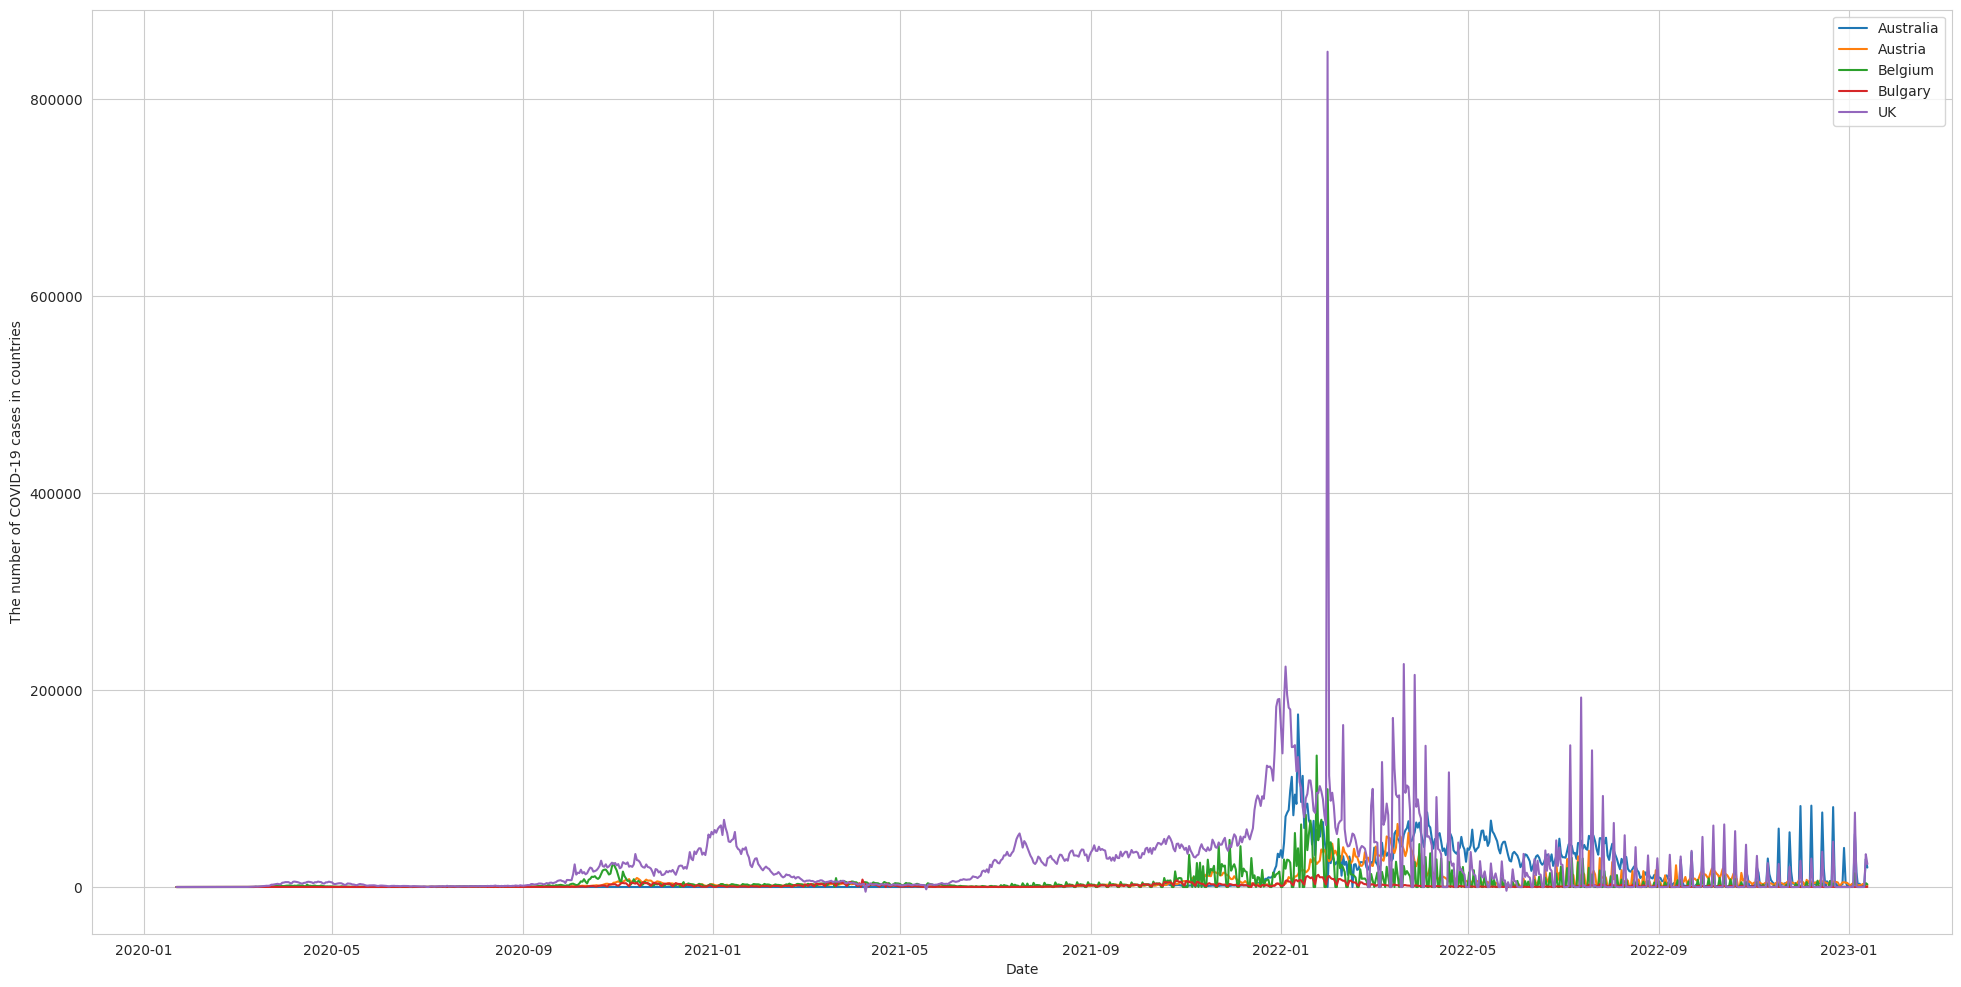

In [ ]:
sns.lineplot(
    data = df,
    x = 'Date',
    y = 'Australia',
    label = 'Australia'
)

sns.lineplot(
    data = df,
    x = 'Date',
    y = 'Austria',
    label = 'Austria'
)

sns.lineplot(
    data = df,
    x = 'Date',
    y = 'Belgium',
    label = 'Belgium'
)

sns.lineplot(
    data = df,
    x = 'Date',
    y = 'Bulgary',
    label = 'Bulgary'
)

sns.lineplot(
    data = df,
    x = 'Date',
    y = 'UK',
    label = 'UK'
)

plt.ylabel('The number of COVID-19 cases in countries')
plt.legend()
plt.show()

In [ ]:
# Changing all negative values to 0
df.loc[df['Australia'] < 0, 'Australia'] = 0
df.loc[df['Austria'] < 0, 'Austria'] = 0
df.loc[df['Denmark'] < 0, 'Denmark'] = 0
df.loc[df['UK'] < 0, 'UK'] = 0

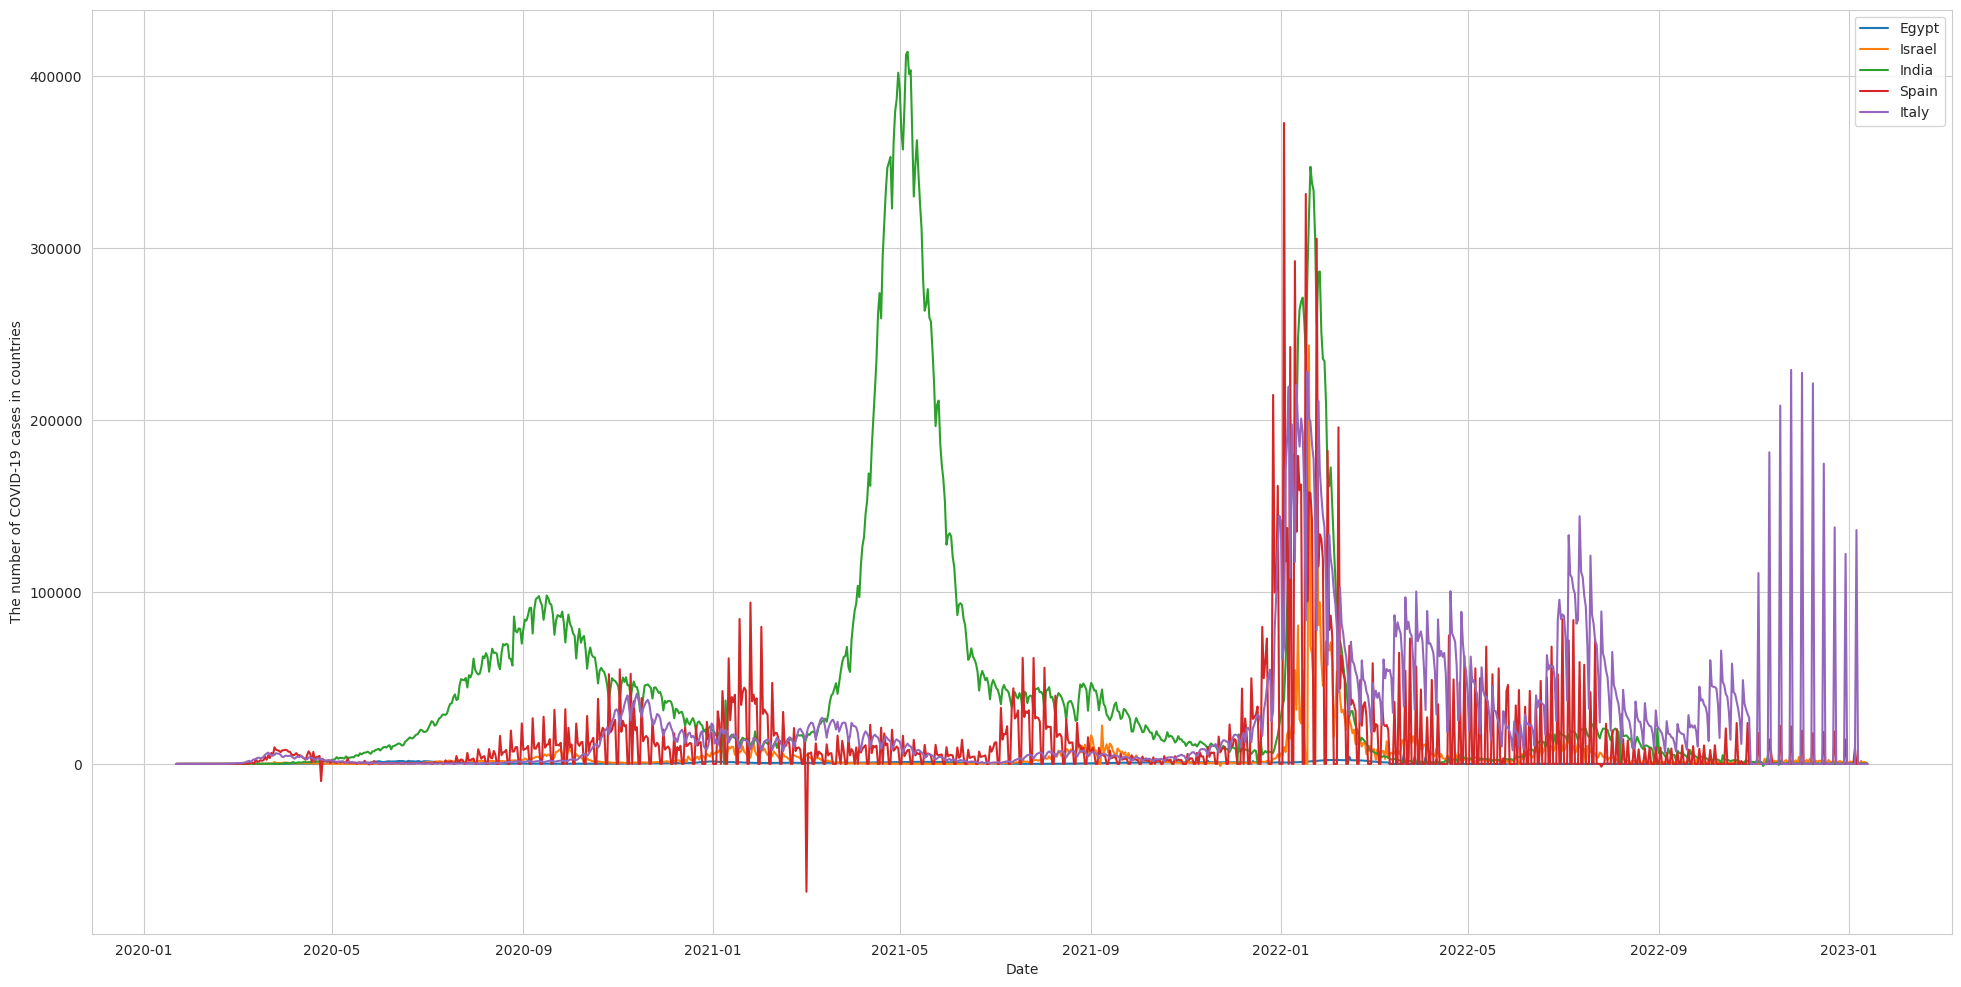

In [ ]:
sns.lineplot(
    data = df,
    x = 'Date',
    y = 'Egypt',
    label = 'Egypt'
)

sns.lineplot(
    data = df,
    x = 'Date',
    y = 'Israel',
    label = 'Israel'
)

sns.lineplot(
    data = df,
    x = 'Date',
    y = 'India',
    label = 'India'
)

sns.lineplot(
    data = df,
    x = 'Date',
    y = 'Spain',
    label = 'Spain'
)

sns.lineplot(
    data = df,
    x = 'Date',
    y = 'Italy',
    label = 'Italy'
)

plt.ylabel('The number of COVID-19 cases in countries')
plt.legend()
plt.show()

In [ ]:
# Changing all negative values to 0
df.loc[df['Spain'] < 0, 'Spain'] = 0
df.loc[df['Israel'] < 0, 'Israel'] = 0
df.loc[df['India'] < 0, 'India'] = 0
df.loc[df['Italy'] < 0, 'Italy'] = 0

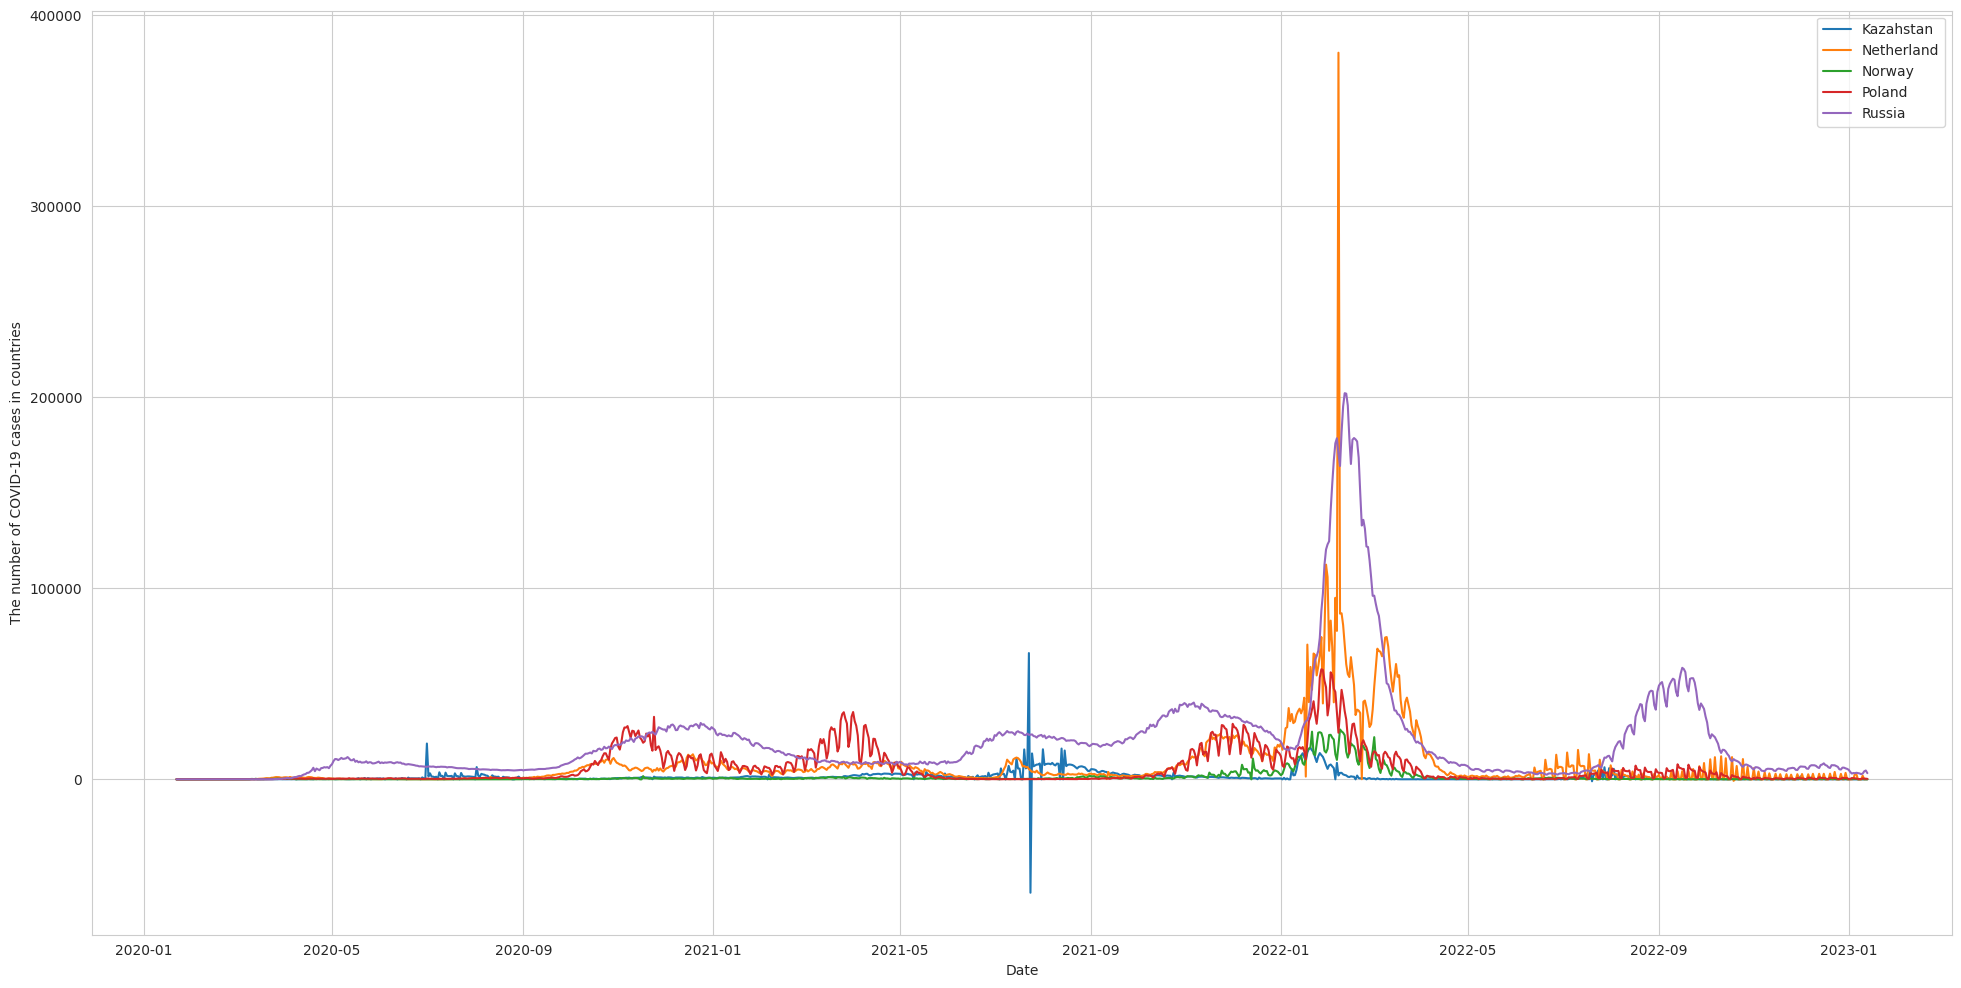

In [ ]:
sns.lineplot(
    data = df,
    x = 'Date',
    y = 'Kazahstan',
    label = 'Kazahstan'
)

sns.lineplot(
    data = df,
    x = 'Date',
    y = 'Netherland',
    label = 'Netherland'
)

sns.lineplot(
    data = df,
    x = 'Date',
    y = 'Norway',
    label = 'Norway'
)

sns.lineplot(
    data = df,
    x = 'Date',
    y = 'Poland',
    label = 'Poland'
)

sns.lineplot(
    data = df,
    x = 'Date',
    y = 'Russia',
    label = 'Russia'
)

plt.ylabel('The number of COVID-19 cases in countries')
plt.legend()
plt.show()

In [ ]:
# Changing all negative values to 0
df.loc[df['Kazahstan'] < 0, 'Kazahstan'] = 0
df.loc[df['Netherland'] < 0, 'Netherland'] = 0

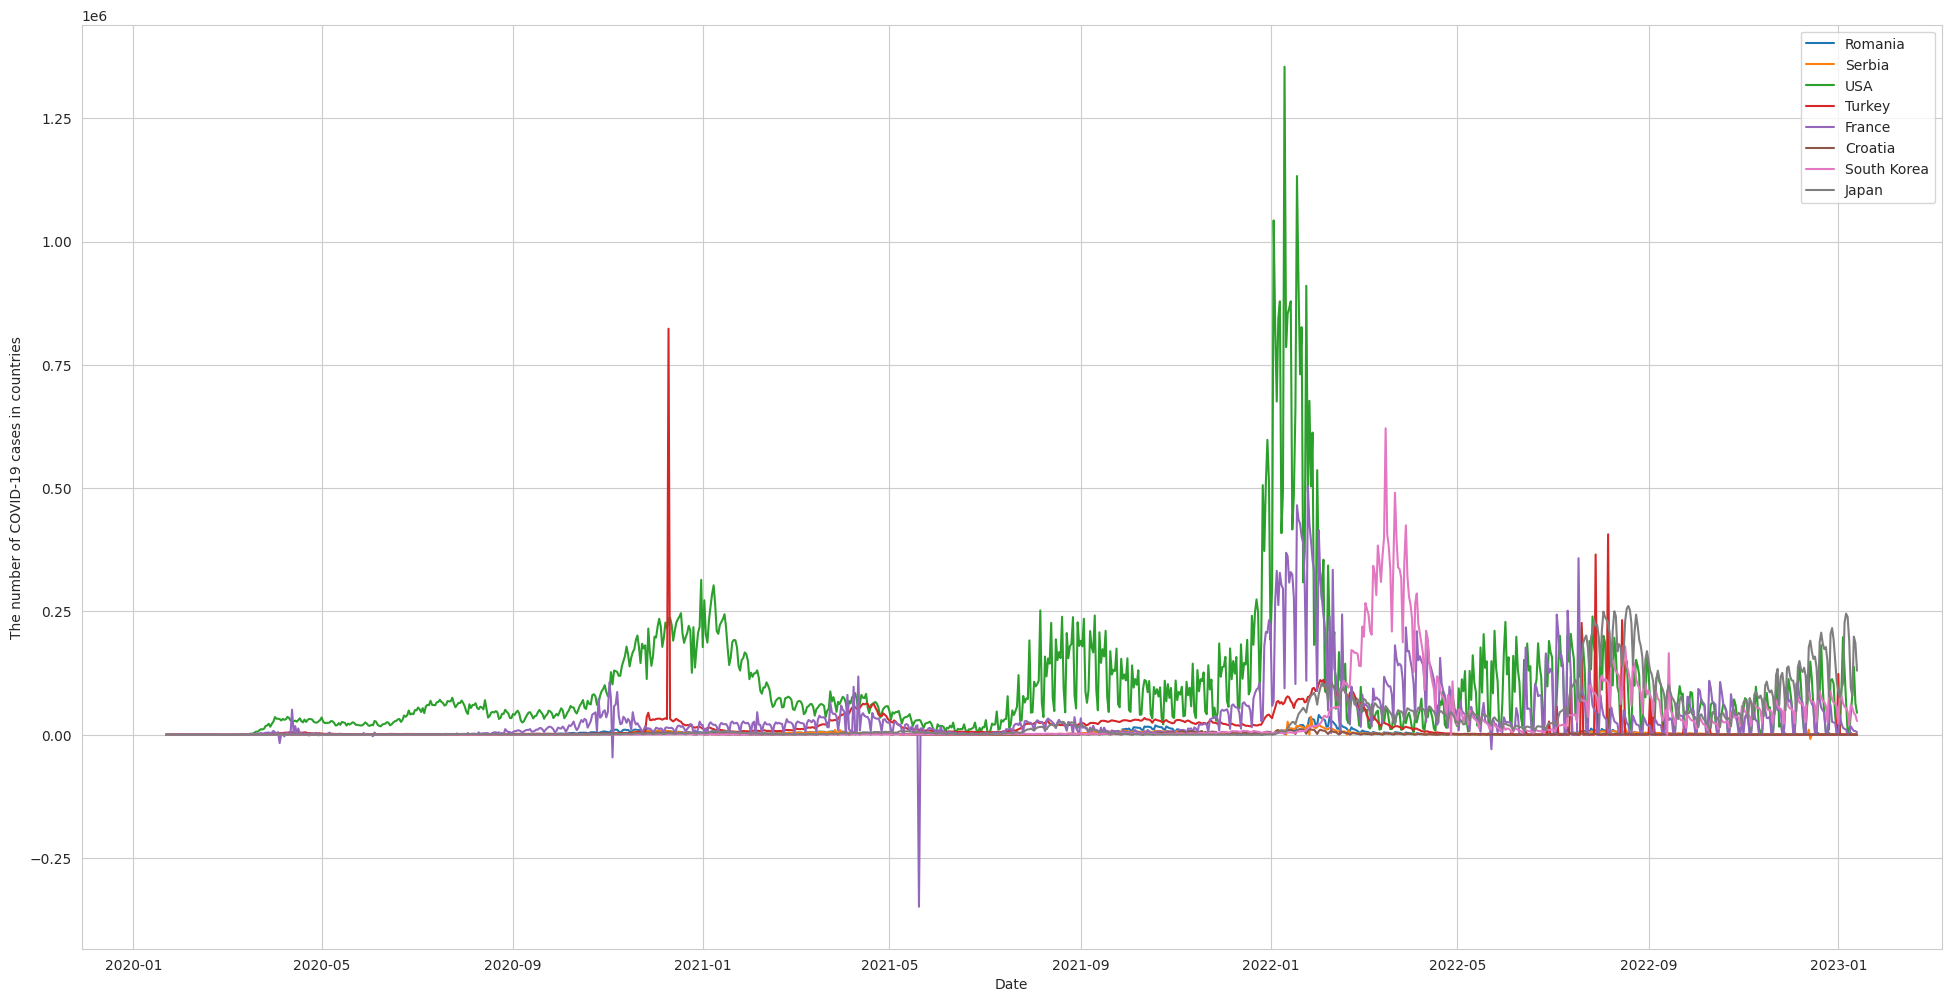

In [ ]:
sns.lineplot(
    data = df,
    x = 'Date',
    y = 'Romania',
    label = 'Romania'
)

sns.lineplot(
    data = df,
    x = 'Date',
    y = 'Serbia',
    label = 'Serbia'
)

sns.lineplot(
    data = df,
    x = 'Date',
    y = 'USA',
    label = 'USA'
)

sns.lineplot(
    data = df,
    x = 'Date',
    y = 'Turkey',
    label = 'Turkey'
)

sns.lineplot(
    data = df,
    x = 'Date',
    y = 'France',
    label = 'France'
)

sns.lineplot(
    data = df,
    x = 'Date',
    y = 'Croatia',
    label = 'Croatia'
)

sns.lineplot(
    data = df,
    x = 'Date',
    y = 'South Korea',
    label = 'South Korea'
)

sns.lineplot(
    data = df,
    x = 'Date',
    y = 'Japan',
    label = 'Japan'
)

plt.ylabel('The number of COVID-19 cases in countries')
plt.legend()
plt.show()

In [ ]:
# Changing all negative values to 0
df.loc[df['Serbia'] < 0, 'Serbia'] = 0
df.loc[df['France'] < 0, 'France'] = 0


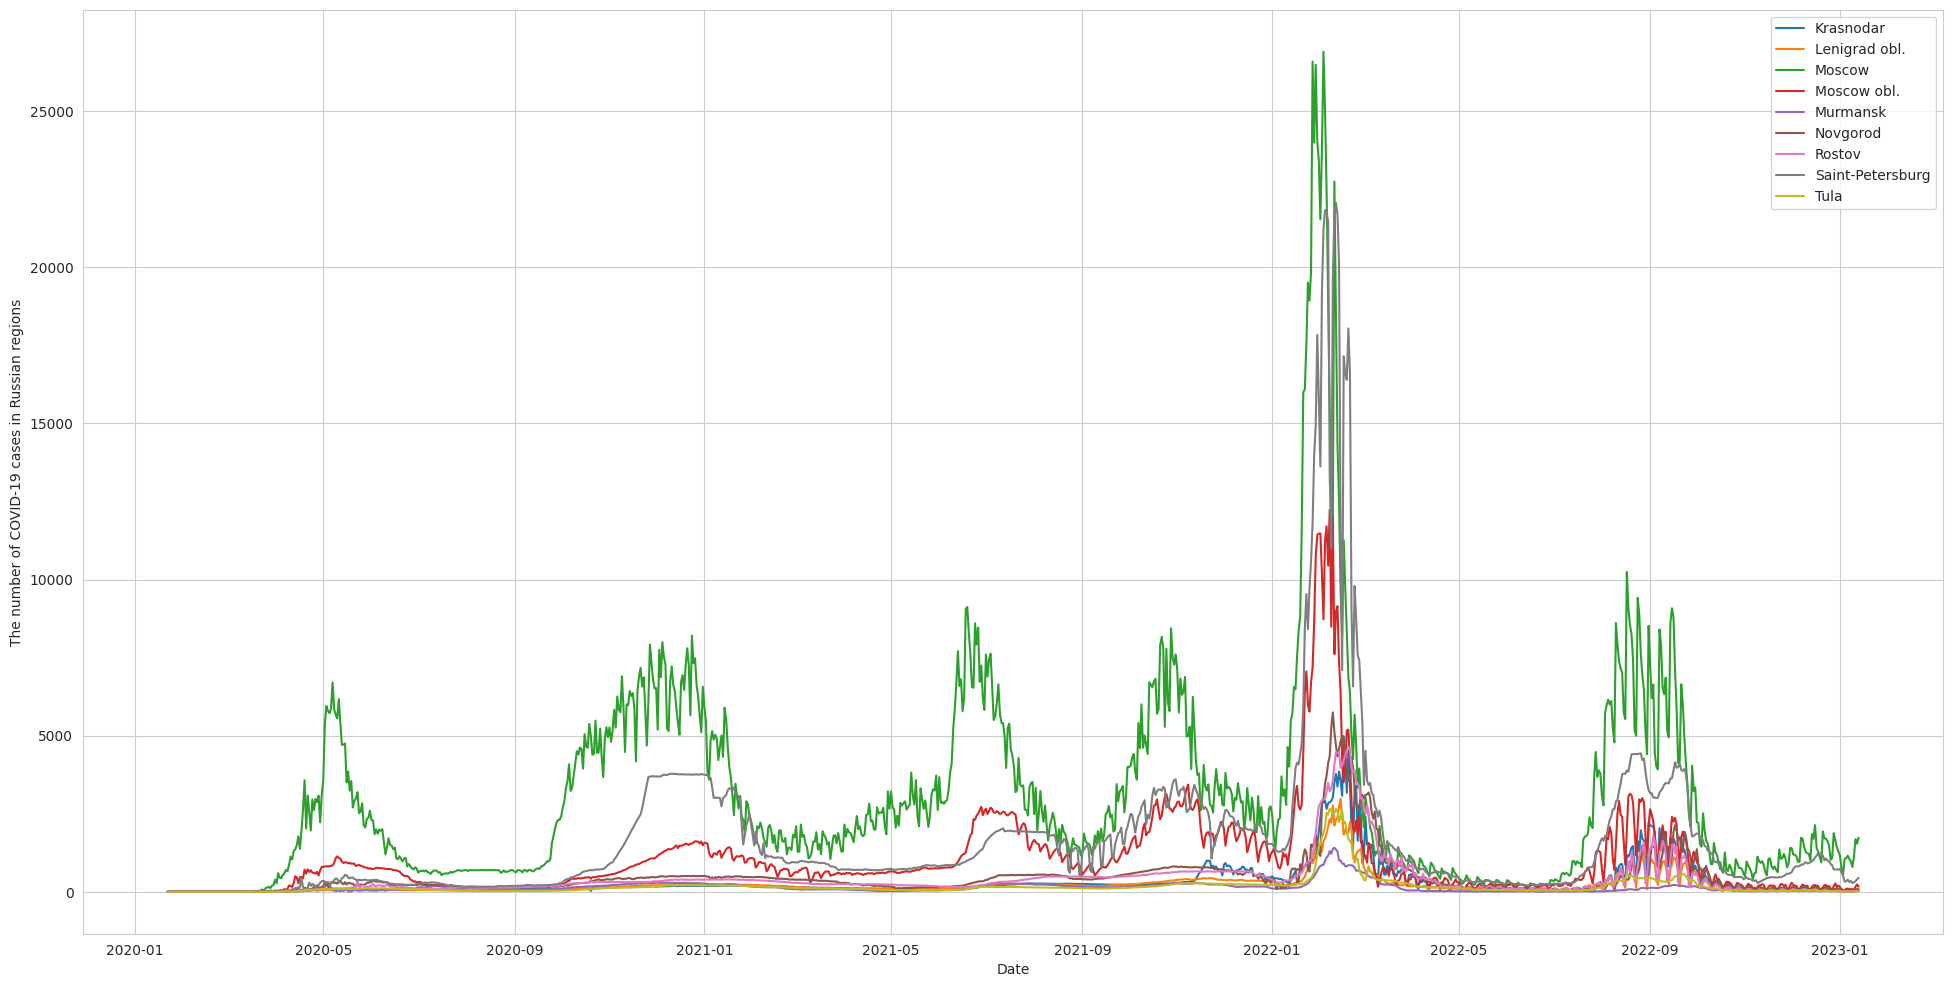

In [ ]:
sns.lineplot(
    data = df,
    x = 'Date',
    y = 'Krasnodar',
    label = 'Krasnodar'
)

sns.lineplot(
    data = df,
    x = 'Date',
    y = 'Lenigrad obl.',
    label = 'Lenigrad obl.'
)

sns.lineplot(
    data = df,
    x = 'Date',
    y = 'Moscow',
    label = 'Moscow'
)

sns.lineplot(
    data = df,
    x = 'Date',
    y = 'Moscow obl.',
    label = 'Moscow obl.'
)

sns.lineplot(
    data = df,
    x = 'Date',
    y = 'Murmansk',
    label = 'Murmansk'
)

sns.lineplot(
    data = df,
    x = 'Date',
    y = 'Novgorod',
    label = 'Novgorod'
)

sns.lineplot(
    data = df,
    x = 'Date',
    y = 'Rostov',
    label = 'Rostov'
)

sns.lineplot(
    data = df,
    x = 'Date',
    y = 'Saint-Petersburg',
    label = 'Saint-Petersburg'
)

sns.lineplot(
    data = df,
    x = 'Date',
    y = 'Tula',
    label = 'Tula'
)

plt.ylabel('The number of COVID-19 cases in Russian regions')
plt.legend()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1088 entries, 0 to 1087
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              1088 non-null   datetime64[ns]
 1   Australia         1088 non-null   int64         
 2   Austria           1088 non-null   int64         
 3   Belgium           1088 non-null   int64         
 4   Bulgary           1088 non-null   int64         
 5   UK                1088 non-null   int64         
 6   Hungrary          1088 non-null   int64         
 7   Germany           1088 non-null   int64         
 8   Greece            1088 non-null   int64         
 9   Georgia           1088 non-null   int64         
 10  Denmark           1088 non-null   int64         
 11  Egypt             1088 non-null   int64         
 12  Israel            1088 non-null   int64         
 13  India             1088 non-null   int64         
 14  Spain             1088 n

In [ ]:
negative_check = {}

for column in df.columns:
    if column != 'Date':
        has_negative = (df[column] < 0).any()
        negative_check[column] = has_negative

print(negative_check)

{'Australia': False, 'Austria': False, 'Belgium': False, 'Bulgary': False, 'UK': False, 'Hungrary': False, 'Germany': False, 'Greece': False, 'Georgia': False, 'Denmark': False, 'Egypt': False, 'Israel': False, 'India': False, 'Spain': False, 'Italy': False, 'Kazahstan': False, 'Netherland': False, 'Norway': False, 'Poland': False, 'Russia': False, 'Romania': False, 'Serbia': False, 'USA': False, 'Turkey': False, 'France': False, 'Croatia': False, 'South Korea': False, 'Japan': False, 'Krasnodar': False, 'Lenigrad obl.': False, 'Moscow': False, 'Moscow obl.': False, 'Murmansk': False, 'Novgorod': False, 'Rostov': False, 'Saint-Petersburg': False, 'Tula': False}


# Stage two.
1. apply SMA7 to all datasets

In [ ]:
columns_to_average = df.columns.difference(['Date'])
df[columns_to_average] = df[columns_to_average].rolling(window=7).mean()

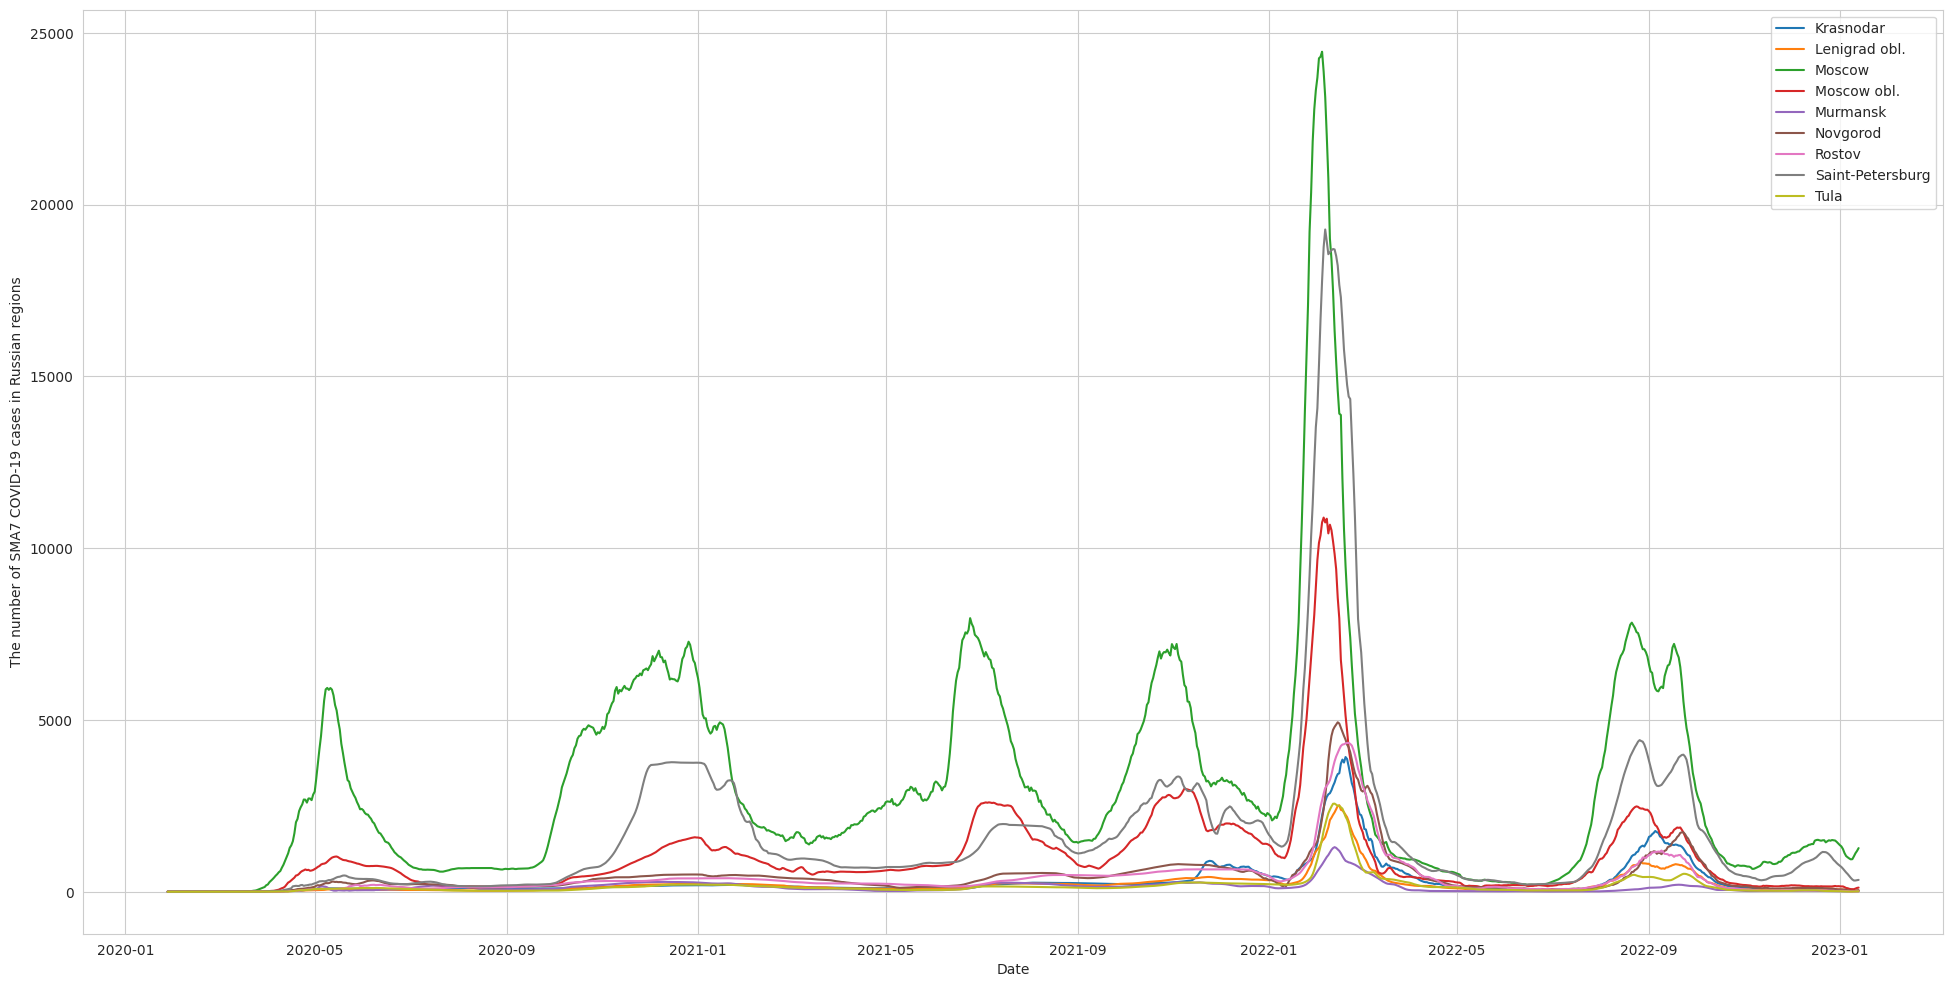

In [ ]:
sns.lineplot(
    data = df,
    x = 'Date',
    y = 'Krasnodar',
    label = 'Krasnodar'
)

sns.lineplot(
    data = df,
    x = 'Date',
    y = 'Lenigrad obl.',
    label = 'Lenigrad obl.'
)

sns.lineplot(
    data = df,
    x = 'Date',
    y = 'Moscow',
    label = 'Moscow'
)

sns.lineplot(
    data = df,
    x = 'Date',
    y = 'Moscow obl.',
    label = 'Moscow obl.'
)

sns.lineplot(
    data = df,
    x = 'Date',
    y = 'Murmansk',
    label = 'Murmansk'
)

sns.lineplot(
    data = df,
    x = 'Date',
    y = 'Novgorod',
    label = 'Novgorod'
)

sns.lineplot(
    data = df,
    x = 'Date',
    y = 'Rostov',
    label = 'Rostov'
)

sns.lineplot(
    data = df,
    x = 'Date',
    y = 'Saint-Petersburg',
    label = 'Saint-Petersburg'
)

sns.lineplot(
    data = df,
    x = 'Date',
    y = 'Tula',
    label = 'Tula'
)

plt.ylabel('The number of SMA7 COVID-19 cases in Russian regions')
plt.legend()
plt.show()

In [ ]:
df.to_csv('/content/drive/MyDrive/Project GAN/SMA7-data.csv', index=False)